## Working With Time Series in Pandas
In this lesson, we will talk about how to work with time series data with pandas dataframes.
- Converting to DataTime Type: `pd.to_datetime(string time)`
    - Specify the time format: `pd.to_datetime(string time, format='%b: %d: %Y') for example


- Working with DateTime Series: 
    - `df.date.dt.year/month/day/hour/week/weekday/day_name/quarter`
    - `df.index.year/month/day/hour/week/weekday/day_name/quarter`


- DateTime Indexes: `df.set_index('date').sort_index()`


- Chaning the Period: `df.asfreq()`
    - Upsampling: to smaller time window
    - Downsampling: to larger time window
    - may introduce missing values
    

- Filling the missing values: 
    - forward fill: from previous observation
    - back fill: from next observation
    
- Resampling: `df.resample().aggregation_functions`


- Plotting


- Rolling Windows: `.rolling()`


- Lagging and Lead: `.shift()` and `.diff()`


- Strftime: `df.index.strftime(string format)`


- Timezones


- Timedeltas: very useful when compte days since...

### Converting to DataTime Type
Thus far we have discuessed numeric and string datatypes in pandas dataframes, but pandas has a special type for dates as well.

To convert an existing string value or values to a datetime type, we can use the `to_datetime` function from the pandas module.

In [72]:
import pandas as pd

pd.to_datetime('Jan 1 1970')

Timestamp('1970-01-01 00:00:00')

In [73]:
# Print out the current time
pd.to_datetime('now')

Timestamp('2020-10-27 01:46:52.525105')

By default pandas will try to infer the date format, but there may be be cases where pandas can't figure out the format itself, and we'd have to help out.

In [74]:
# Return ValueError when pandas can't figure out the foramt

try:
    pd.to_datetime('Jan:1:1970')
except ValueError as e:
    print('ValueError', e)

ValueError Unknown string format: Jan:1:1970


Here we can specify a **format string** to tell pandas explicitly how to convert this date.

In [75]:
# Tell pandas how to convert this date

pd.to_datetime('Jan:1:1970', format='%b:%d:%Y')

Timestamp('1970-01-01 00:00:00')

In addition to clarifying date format ambiguity, adding the `format= keyword` argument can significantly speed up the processing of larger datasets with non-standard formats.

In addition to single strings, `pd.to_datetime` will work with entire columns at a time.

In [76]:
# Read coffee_consumption.csv

df = pd.read_csv('https://gist.githubusercontent.com/zgulde/c60209f379155744ced4dfc57068e55b/raw/97fc3ab1e2f6fff6ffd409d60029c53954d5784e/coffee_consumption.csv')

# Print out the dtypes of the columns
print(df.dtypes)

# Print out the top 5 rows of the df. 
df.head()

date                   object
coffee_consumption    float64
dtype: object


,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


In [77]:
# Convert out date column to datetime type

df.date = pd.to_datetime(df.date)
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

### Working with DateTime Series
- The `.dt` accessor can be used to access various properties of a date. 
- Some of the more common ones are listed here, and you can reference the pandas documentation for a full list.

In [78]:
# Add columns of the yer, month, day, and hour

df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['hour'] = df.date.dt.hour
df.head()

,date,coffee_consumption,year,month,day,hour
0,2019-01-01,14.301915,2019,1,1,0
1,2019-01-02,12.905900,2019,1,2,0
2,2019-01-03,10.046015,2019,1,3,0
3,2019-01-04,6.354805,2019,1,4,0
4,2019-01-07,8.545563,2019,1,7,0


In [79]:
df.dtypes # The dtypes of the new columns are int64

date                  datetime64[ns]
coffee_consumption           float64
year                           int64
month                          int64
day                            int64
hour                           int64
dtype: object

In [17]:
# Add columns of the week, weekday, weekday_name and quarter

df['week'] = df.date.dt.week
df['weekday'] = df.date.dt.weekday
df['day_name'] = df.date.dt.day_name()
df['quarter'] = df.date.dt.quarter
df.head()

,date,coffee_consumption,year,month,day,hour,week,weekday,day_name,quarter
0,2019-01-01,14.301915,2019,1,1,0,1,1,Tuesday,1
1,2019-01-02,12.905900,2019,1,2,0,1,2,Wednesday,1
2,2019-01-03,10.046015,2019,1,3,0,1,3,Thursday,1
3,2019-01-04,6.354805,2019,1,4,0,1,4,Friday,1
4,2019-01-07,8.545563,2019,1,7,0,2,0,Monday,1


### DateTime Indexes
Once we have a date-time column on a dataframe, we can use that column as the index on our dataframe.

In [18]:
df = df.set_index('date').sort_index()
df

,coffee_consumption,year,month,day,hour,week,weekday,day_name,quarter
date,,,,,,,,,
2019-01-01,14.301915,2019,1,1,0,1,1,Tuesday,1
2019-01-02,12.905900,2019,1,2,0,1,2,Wednesday,1
2019-01-03,10.046015,2019,1,3,0,1,3,Thursday,1
2019-01-04,6.354805,2019,1,4,0,1,4,Friday,1
2019-01-07,8.545563,2019,1,7,0,2,0,Monday,1
...,...,...,...,...,...,...,...,...,...
2019-12-25,12.250875,2019,12,25,0,52,2,Wednesday,4
2019-12-26,7.513206,2019,12,26,0,52,3,Thursday,4
2019-12-27,9.464345,2019,12,27,0,52,4,Friday,4


**You should sort the dataframe by the datetime field before doing any date-related manipulations**, otherwise they could have undefined behavior.

Having a datetime index on our dataframe allows us to use a lot of time series specific functionality within pandas. All of the functionality we'll discuss in the rest of this lesson requires a dataframe with a datetime index.

First let's take a look at the start and end of our data:

In [19]:
# Range of the dates
df.index.min(), df.index.max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-12-31 00:00:00'))

All of the properties previously discussed available through **the datetime accessor** are available directly on **datetime index objects**. That is if you have a dataframe with a date column,

**`df.date.dt.year`**

will give you the same results as

**`df.index.year`**<br>
if `date` has been set as the index in the second code example.

With a datetime index we can **access specific subsets of the data** like so:

In [20]:
# Observations in May 2019
df['2019-05']

,coffee_consumption,year,month,day,hour,week,weekday,day_name,quarter
date,,,,,,,,,
2019-05-01,9.970773,2019,5,1,0,18,2,Wednesday,2
2019-05-02,8.755956,2019,5,2,0,18,3,Thursday,2
2019-05-03,7.790948,2019,5,3,0,18,4,Friday,2
2019-05-06,13.196664,2019,5,6,0,19,0,Monday,2
2019-05-07,11.725856,2019,5,7,0,19,1,Tuesday,2
2019-05-08,8.495455,2019,5,8,0,19,2,Wednesday,2
2019-05-09,11.407965,2019,5,9,0,19,3,Thursday,2
2019-05-10,11.344190,2019,5,10,0,19,4,Friday,2
2019-05-13,9.517543,2019,5,13,0,20,0,Monday,2


In [21]:
# Observations between May 06 2019 and May 16 2019
df['2019-05-06': '2019-05-16'] # NB. inclusive

,coffee_consumption,year,month,day,hour,week,weekday,day_name,quarter
date,,,,,,,,,
2019-05-06,13.196664,2019,5,6,0,19,0,Monday,2
2019-05-07,11.725856,2019,5,7,0,19,1,Tuesday,2
2019-05-08,8.495455,2019,5,8,0,19,2,Wednesday,2
2019-05-09,11.407965,2019,5,9,0,19,3,Thursday,2
2019-05-10,11.344190,2019,5,10,0,19,4,Friday,2
2019-05-13,9.517543,2019,5,13,0,20,0,Monday,2
2019-05-14,6.220478,2019,5,14,0,20,1,Tuesday,2
2019-05-15,12.743796,2019,5,15,0,20,2,Wednesday,2
2019-05-16,9.169615,2019,5,16,0,20,3,Thursday,2


Note that unlike list slicing syntax, slicing with dates in the example above is inclusive of the upper bound.

### Changing the Period
- Notice that all of the days aren't one after another, there are some gaps in our data. Often times it is the case that we want a uniform amount of time between observations in each row. 
- In addition, there are times where we might wish to either increase or decrease the granularity of our data.
- **Upsampling** refers to the practice of resampling our data such that it is at a smaller time window. For example, changing our data from weekly to daily frequency or chaning data from hourly to every 10 minutes. 
- **Downsampling** is the opposite, going to a larger unit of time, for example, going from weekly to monthly frequency. Downsampling will increase the number of data points in our data frame and upsampling will reduce the number of data points.
- One way to accomplish this is with the `.asfreq` method.

In [22]:
by_day = df.asfreq('D')
by_day

,coffee_consumption,year,month,day,hour,week,weekday,day_name,quarter
date,,,,,,,,,
2019-01-01,14.301915,2019.0,1.0,1.0,0.0,1.0,1.0,Tuesday,1.0
2019-01-02,12.905900,2019.0,1.0,2.0,0.0,1.0,2.0,Wednesday,1.0
2019-01-03,10.046015,2019.0,1.0,3.0,0.0,1.0,3.0,Thursday,1.0
2019-01-04,6.354805,2019.0,1.0,4.0,0.0,1.0,4.0,Friday,1.0
2019-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2019-12-27,9.464345,2019.0,12.0,27.0,0.0,52.0,4.0,Friday,4.0
2019-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Notice here several things have changed:
- We now have a larger number of rows, 365 rows in total, one row per day. 
- Each date is one day greater than the next.
- We introduced some nulls into our data.
- Now our data represents an entire year, but we introduced NaNs where we were missing data.

Filling Missing Values
- Pandas contains some special methods for filling missing values in time series data. 
- We can either fill the missing values with a specified value (like we've seen in the past), or **we can fill with the value from the previous observation (a forward fill)**, or **we can fill with the value from the next observation (a back fill).**

In [24]:
by_day.columns

Index(['coffee_consumption', 'year', 'month', 'day', 'hour', 'week', 'weekday',
       'day_name', 'quarter'],
      dtype='object')

In [26]:
# For illustration purpose, drop the added columns

by_day.drop(columns=['year', 'month', 'day', 'hour', 
                     'week', 'weekday','day_name', 'quarter'], inplace=True)
by_day

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,NaN
...,...
2019-12-27,9.464345
2019-12-28,NaN
2019-12-29,NaN


In [27]:
# Demo for forward fill and back fill

by_day.assign(ffill = lambda df: df.coffee_consumption.ffill(), 
              bfill = lambda df: df.coffee_consumption.bfill()).head(15) # Doesn't override the existing df

,coffee_consumption,ffill,bfill
date,,,
2019-01-01,14.301915,14.301915,14.301915
2019-01-02,12.905900,12.905900,12.905900
2019-01-03,10.046015,10.046015,10.046015
2019-01-04,6.354805,6.354805,6.354805
2019-01-05,NaN,6.354805,8.545563
2019-01-06,NaN,6.354805,8.545563
2019-01-07,8.545563,8.545563,8.545563
2019-01-08,9.410101,9.410101,9.410101
2019-01-09,7.219271,7.219271,7.219271


In this case we might assume that the missing days are weekends where no coffee was consumed and fill with 0s.

In [30]:
# Copy by_day to a new df
df = by_day.copy()

# Fill the Nans with 0s
df = df.fillna(0)
df

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,0.000000
...,...
2019-12-27,9.464345
2019-12-28,0.000000
2019-12-29,0.000000


### Resampling

Resampling can be thought of **as a sort of group by operation**, but using a date component to do the grouping. It is similar in functionality to the `.asfreq` method, but allows more flexibility. Note that a resample only works on dataframes with a datetime index.

Like a group by, once our data is resampled, we must specify an aggregation operation.

For example, to get the average coffee consumption over time:

In [31]:
# Groupby the date in a 3 weeks span and calculate the mean

df.resample('3W').mean() # Every 3 weeks

,coffee_consumption
date,
2019-01-06,7.268106
2019-01-27,6.960135
2019-02-17,7.753787
2019-03-10,6.723909
2019-03-31,7.901977
2019-04-21,7.301799
2019-05-12,7.208603
2019-06-02,7.894871
2019-06-23,6.851534


To get the total coffee consumption for each month:

In [32]:
df.resample('M').sum()

,coffee_consumption
date,
2019-01-31,233.926749
2019-02-28,206.038853
2019-03-31,219.779000
2019-04-30,222.030626
2019-05-31,248.480093
2019-06-30,183.656493
2019-07-31,248.267463
2019-08-31,224.007066
2019-09-30,215.689004


You can reference the pandas documentation for a full list of valid resampling periods.

### Plotting

We'll discuss further visualization techniques in the exploration lesson, but pandas makes it very easy to plot time series data. Columns in a dataframe with a datetime index will be plotted as lines with time on the x-axis by simply calling `.plot`.

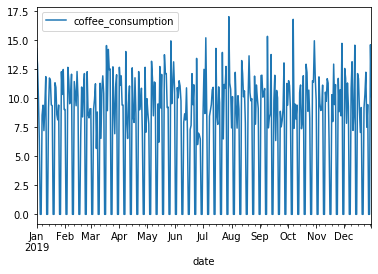

In [33]:
df.plot()

This will work with the results of a resample as well:

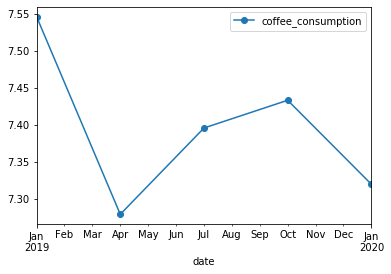

In [35]:
df.resample('3M').mean().plot(marker='o') # Becasue df.plot()

### Rolling Windows
- The `.rolling()` method can be used to calculate **rolling averages.**
- A rolling average lets us answer questions like: what was the average over the last 3 days? For every day in our dataset.

,coffee_consumption,rolling_3,rolling_5,rolling_7
date,,,,
2019-01-06,7.268106,NaN,NaN,NaN
2019-01-13,6.626580,NaN,NaN,NaN
2019-01-20,7.332212,7.075633,NaN,NaN
2019-01-27,6.921614,6.960135,NaN,NaN
2019-02-03,7.599649,7.284492,7.149632,NaN
2019-02-10,7.996775,7.506013,7.295366,NaN
2019-02-17,7.664936,7.753787,7.503037,7.344267
2019-02-24,7.006021,7.555911,7.437799,7.306827
2019-03-03,6.775931,7.148963,7.408662,7.328163


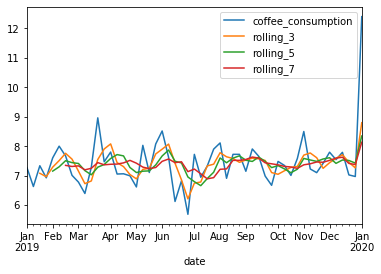

In [42]:
rolling_df = df.resample('W').mean().assign(rolling_3 = lambda df: df.coffee_consumption.rolling(3).mean(), 
                                            rolling_5 = lambda df: df.coffee_consumption.rolling(5).mean(), 
                                            rolling_7 = lambda df: df.coffee_consumption.rolling(7).mean())

rolling_df.plot()
rolling_df.head(20)

We could also **apply other aggregations** with the `.rolling` method if we wanted:

In [43]:
df.resample('W').mean().rolling(4).sum()

,coffee_consumption
date,
2019-01-06,NaN
2019-01-13,NaN
2019-01-20,NaN
2019-01-27,28.148512
2019-02-03,28.480055
2019-02-10,29.850250
2019-02-17,30.182974
2019-02-24,30.267381
2019-03-03,29.443663


### Lagging and Lead
- `.shift`: move the data backwards and forwards by a given amount
- `.diff`:  find the difference with the previous observation (or a specified further back observation)

In [45]:
df['shift(-1)'] = df.coffee_consumption.shift(-1)
df['shift(1)'] = df.coffee_consumption.shift(1)
df['shift(3)'] = df.coffee_consumption.shift(3)
df['diff(1)'] = df.coffee_consumption.diff(1)
df['diff(3)'] = df.coffee_consumption.diff(3)
df.head(25)

,coffee_consumption,shift(-1),shift(1),shift(3),diff(1),diff(3)
date,,,,,,
2019-01-01,14.301915,12.905900,NaN,NaN,NaN,NaN
2019-01-02,12.905900,10.046015,14.301915,NaN,-1.396015,NaN
2019-01-03,10.046015,6.354805,12.905900,NaN,-2.859885,NaN
2019-01-04,6.354805,0.000000,10.046015,14.301915,-3.691210,-7.947110
2019-01-05,0.000000,0.000000,6.354805,12.905900,-6.354805,-12.905900
2019-01-06,0.000000,8.545563,0.000000,10.046015,0.000000,-10.046015
2019-01-07,8.545563,9.410101,0.000000,6.354805,8.545563,2.190757
2019-01-08,9.410101,7.219271,8.545563,0.000000,0.864539,9.410101
2019-01-09,7.219271,9.338456,9.410101,0.000000,-2.190831,7.219271


In [46]:
# Cleanup the additional columns
for col in ['shift(-1)', 'shift(1)', 'shift(3)', 'diff(1)', 'diff(3)']:
    del df[col]

### Strftime (string + format + time)
The **`strftime`** method can be used **to format dates** in a custom way using **format specifiers.**

In [49]:
df.index.strftime('%B %d, %Y')[:4]

Index(['January 01, 2019', 'January 02, 2019', 'January 03, 2019',
       'January 04, 2019'],
      dtype='object', name='date')

Here the `%B` means the full month name, `%d` means the 2-digit day and `%Y` means the 4-digit year.

See [**the python documentation**](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) for a full listing of format specifiers.

### Timezones

In [60]:
# To add a timezone to data that has none, use `.tz_localize`. 
# For central time: tz_localize("America/Chicago")

df.tz_localize("America/Chicago").head(5)

,coffee_consumption
date,
2019-01-01 00:00:00-06:00,14.301915
2019-01-02 00:00:00-06:00,12.905900
2019-01-03 00:00:00-06:00,10.046015
2019-01-04 00:00:00-06:00,6.354805
2019-01-05 00:00:00-06:00,0.000000


In [61]:
# `.tz_localize(none)` will remove a timezone

df.tz_localize("America/Chicago").tz_localize(None).head(5)

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,0.000000


In [65]:
# `.tz_convert can be used to convert data from one timezone to another

df.tz_localize("America/Chicago").tz_convert('Europe/Berlin').head(5)

,coffee_consumption
date,
2019-01-01 07:00:00+01:00,14.301915
2019-01-02 07:00:00+01:00,12.905900
2019-01-03 07:00:00+01:00,10.046015
2019-01-04 07:00:00+01:00,6.354805
2019-01-05 07:00:00+01:00,0.000000


In [66]:
# `df.index.tz is None` to check if a dataframe has a timzezone set

df.index.tz is None

True

In [67]:
df.tz_localize("America/Chicago").index.tz is None

False

### Timedeltas
We can use pandas **to calculate how much time has elapsed between 2 data points.** For example, let's calculate how many days it was between codeup's first data science cohort start date and graduation date.

In [68]:
start_date = pd.to_datetime('20190204')
graduation_date = pd.to_datetime('20190614')

days_between = graduation_date - start_date
days_between

Timedelta('130 days 00:00:00')

**To convert this Timedelta object to a number:**

In [70]:
days_between // pd.Timedelta('1d')

130

This will also work with multiple dates at once. For example, we can calculate **how many days it was between the last date in a dataset and each data point like so:**

In [71]:
df['days_since_max'] = (df.index.max() - df.index) // pd.Timedelta('1d')
df.tail(10)  # Like countdown

,coffee_consumption,days_since_max
date,,
2019-12-22,0.000000,9
2019-12-23,9.162464,8
2019-12-24,10.372400,7
2019-12-25,12.250875,6
2019-12-26,7.513206,5
2019-12-27,9.464345,4
2019-12-28,0.000000,3
2019-12-29,0.000000,2
2019-12-30,14.623106,1
